In [53]:
import sympy as sym
sym.init_printing(pretty_print=True)
from IPython.display import display

# Topliss

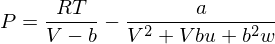

$$P = \frac{R T}{V - b} - \frac{a}{V^{2} + V b u + b^{2} w}$$


In [54]:
V,a,b,R,T,u,w = sym.symbols('V,a,b,R,T,u,w')

#Equação de Soave [Poling]
P=R*T/(V-b)-a/(V**2+u*b*V+w*b**2)

P_eq=sym.Eq(sym.symbols('P'),P)

display(P_eq)

print( sym.latex(P_eq, mode='equation', itex=True) )

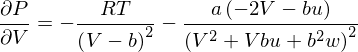

$$\frac{\partial{P}}{\partial{V}} = - \frac{R T}{\left(V - b\right)^{2}} - \frac{a \left(- 2 V - b u\right)}{\left(V^{2} + V b u + b^{2} w\right)^{2}}$$


In [23]:
dPdV=sym.diff(P,V)

dPdV_eq=sym.Eq(sym.symbols(r'\frac{\partial{P}}{\partial{V}}'),dPdV)

display(dPdV_eq)

print( sym.latex(dPdV_eq, mode='equation', itex=True) )

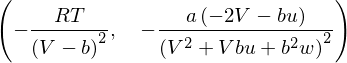

In [5]:
display(dPdV.args)

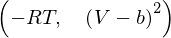

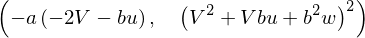

In [8]:
display(sym.fraction(dPdV.args[0]))
display(sym.fraction(dPdV.args[1]))

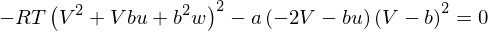

$$- R T \left(V^{2} + V b u + b^{2} w\right)^{2} - a \left(- 2 V - b u\right) \left(V - b\right)^{2} = 0$$


In [24]:
num1=sym.fraction(dPdV.args[0])[0]
num2=sym.fraction(dPdV.args[1])[0]
den1=sym.fraction(dPdV.args[0])[1]
den2=sym.fraction(dPdV.args[1])[1]

zero=num1*den2+num2*den1

zero_eq=sym.Eq(zero,0)

display(zero_eq)

print( sym.latex(zero_eq, mode='equation', itex=True) )

In [12]:
#expandir distributivas e potências
expr=sym.expand(zero)
display(expr)

In [26]:
#coletar coeficientes da representaçção polinomial
col=sym.collect(expr,V)
display(col)

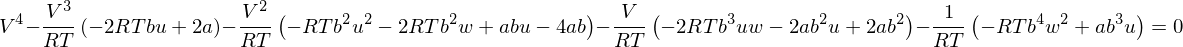

$$V^{4} - \frac{V^{3}}{R T} \left(- 2 R T b u + 2 a\right) - \frac{V^{2}}{R T} \left(- R T b^{2} u^{2} - 2 R T b^{2} w + a b u - 4 a b\right) - \frac{V}{R T} \left(- 2 R T b^{3} u w - 2 a b^{2} u + 2 a b^{2}\right) - \frac{1}{R T} \left(- R T b^{4} w^{2} + a b^{3} u\right) = 0$$


In [52]:
poly=sym.Integer(0)
for i in range(4,-1,-1):
    poly+= col.coeff(V,i)/col.coeff(V,4) *V**i
    
poly_eq=sym.Eq(poly,0)

display(poly_eq)

print( sym.latex(poly_eq, mode='equation', itex=True) )

In [51]:
# imprimir expressões em notação de operadores matémáticos python
for i in range(4,-1,-1):
    print("c"+'{:1d}'.format(i),"=", col.coeff(V,i)/col.coeff(V,4))

c4 = 1
c3 = -(-2*R*T*b*u + 2*a)/(R*T)
c2 = -(-R*T*b**2*u**2 - 2*R*T*b**2*w + a*b*u - 4*a*b)/(R*T)
c1 = -(-2*R*T*b**3*u*w - 2*a*b**2*u + 2*a*b**2)/(R*T)
c0 = -(-R*T*b**4*w**2 + a*b**3*u)/(R*T)


# Residual A

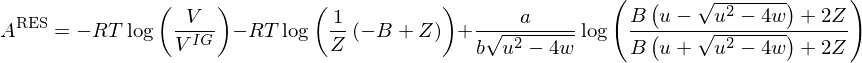

$$A^{\mathrm{RES}} = - R T \log{\left (\frac{V}{V^{IG}} \right )} - R T \log{\left (\frac{1}{Z} \left(- B + Z\right) \right )} + \frac{a}{b \sqrt{u^{2} - 4 w}} \log{\left (\frac{B \left(u - \sqrt{u^{2} - 4 w}\right) + 2 Z}{B \left(u + \sqrt{u^{2} - 4 w}\right) + 2 Z} \right )}$$


In [92]:
#V,a,b,R,T,u,w = sym.symbols('V,a,b,R,T,u,w')
Z,B,V0 = sym.symbols('Z,B,V^{IG}')
A_res = (a)/(b*sym.sqrt(u**2-4*w))*sym.ln((2*Z+B*(u-sym.sqrt(u**2-4*w)))/(2*Z+B*(u+sym.sqrt(u**2-4*w))))-R*T*sym.ln((Z-B)/(Z))-R*T*sym.ln((V)/(V0))

A_res_eq=sym.Eq(sym.symbols(r'A^{\mathrm{RES}}'),A_res)
display(A_res_eq)
print( sym.latex(A_res_eq, mode='equation', itex=True) )


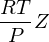

In [93]:
symP=sym.symbols('P')
fV=R*T*Z/symP
display(fV)

In [94]:
fV0=R*T/symP
display(fV0)

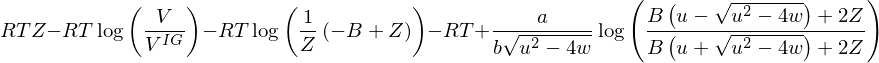

In [95]:
G_res=A_res+symP*fV-symP*fV0
display(G_res)

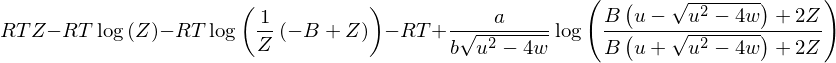

In [96]:
G_res1=G_res.subs(V,fV).subs(V0,fV0)
display(G_res1)

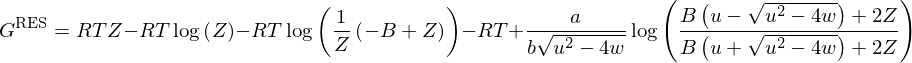

$$G^{\mathrm{RES}} = R T Z - R T \log{\left (Z \right )} - R T \log{\left (\frac{1}{Z} \left(- B + Z\right) \right )} - R T + \frac{a}{b \sqrt{u^{2} - 4 w}} \log{\left (\frac{B \left(u - \sqrt{u^{2} - 4 w}\right) + 2 Z}{B \left(u + \sqrt{u^{2} - 4 w}\right) + 2 Z} \right )}$$


In [97]:
G_res1_eq=sym.Eq(sym.symbols(r'G^{\mathrm{RES}}'),G_res1)
display(G_res1_eq)
print( sym.latex(G_res1_eq, mode='equation', itex=True) )


In [98]:
print(G_res1)

R*T*Z - R*T*log(Z) - R*T*log((-B + Z)/Z) - R*T + a*log((B*(u - sqrt(u**2 - 4*w)) + 2*Z)/(B*(u + sqrt(u**2 - 4*w)) + 2*Z))/(b*sqrt(u**2 - 4*w))
